In [1]:
# 1. Подключимся к базе
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("vk_cleaned.db")

In [2]:
# 2. Загрузим данные через SQL
df = pd.read_sql_query("SELECT * FROM posts", conn)
df.head()

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour,text_len
0,0,2021-11-01 10:32:31,"Нет, это не шутка! Попробовать 34 курса и инте...",1.0,10.0,vk,152,417,719,63145,406,1,2021,11,0,10,406
1,1,2022-01-02 10:18:21,"Интересно, что случилось с теми зайчиками и ли...",0.0,6.0,api,2,26,5,17319,427,0,2022,1,6,10,427
2,2,2021-12-31 10:00:22,"Уверены, по дороге к нашему аккаунту вы успели...",0.0,5.0,api,3,87,57,21783,237,0,2021,12,4,10,237
3,3,2021-12-29 07:00:40,"Пост-напоминалка для всех, кто забыл поздравит...",0.0,8.0,api,4,103,66,24419,402,0,2021,12,2,7,402
4,4,2021-12-28 14:16:42,Периодически слышите фразу: «Мы вам перезвоним...,0.0,6.0,api,0,28,5,19849,572,0,2021,12,1,14,572


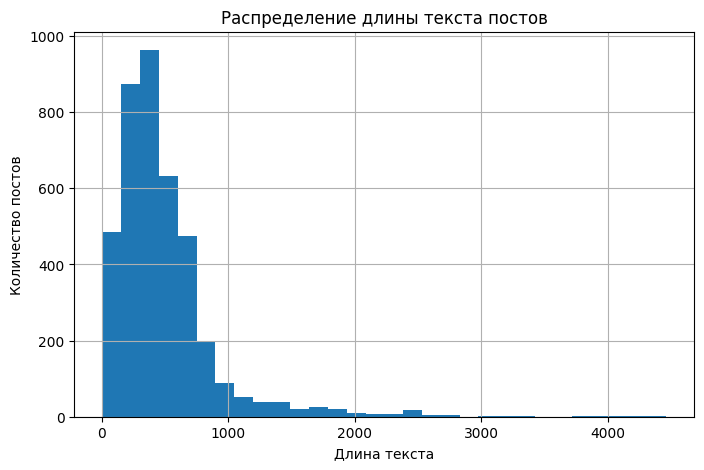

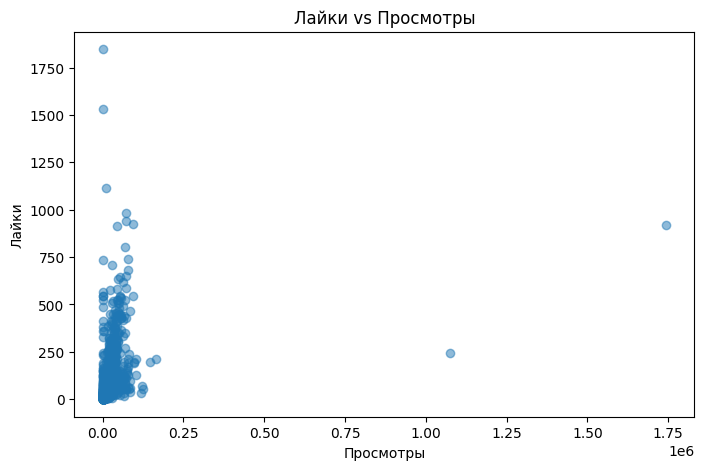

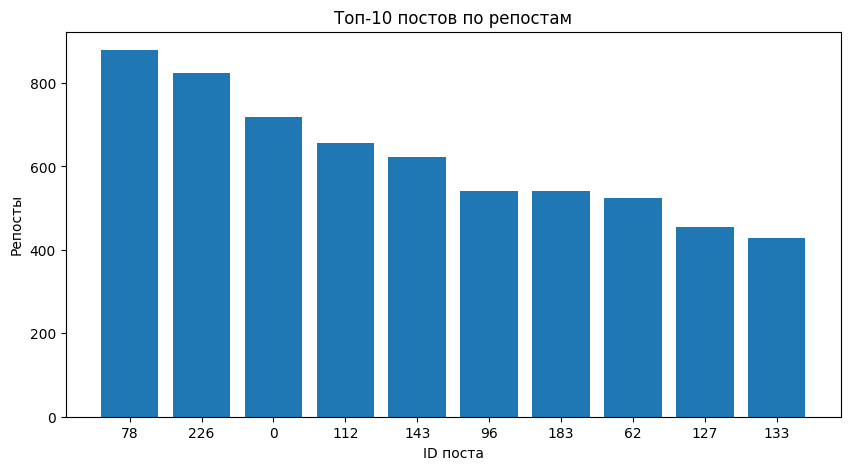

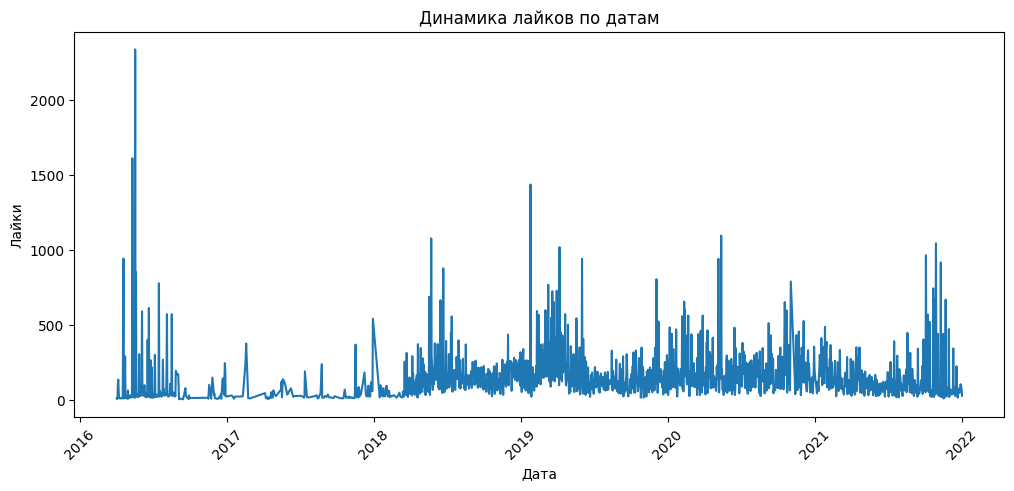

In [3]:
# 3. Построем графики

# Распределение длины текста
plt.figure(figsize=(8,5))
df['text_len'].hist(bins=30)
plt.title("Распределение длины текста постов")
plt.xlabel("Длина текста")
plt.ylabel("Количество постов")
plt.show()

#Лайки против просмотров
plt.figure(figsize=(8,5))
plt.scatter(df['views'], df['likes'], alpha=0.5)
plt.title("Лайки vs Просмотры")
plt.xlabel("Просмотры")
plt.ylabel("Лайки")
plt.show()

#Топ-10 постов по репостам
top_reposts = df.nlargest(10, 'reposts')
plt.figure(figsize=(10,5))
plt.bar(top_reposts.index.astype(str), top_reposts['reposts'])
plt.title("Топ-10 постов по репостам")
plt.xlabel("ID поста")
plt.ylabel("Репосты")
plt.show()

#Динамика активности (если есть даты)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_likes = df.groupby(df['date'].dt.date)['likes'].sum()

plt.figure(figsize=(12,5))
daily_likes.plot()
plt.title("Динамика лайков по датам")
plt.xlabel("Дата")
plt.ylabel("Лайки")
plt.xticks(rotation=45)
plt.show()


In [4]:
# Закрой соединение
conn.close()
